# 1. Image Negative

In [ ]:
from PIL import Image
import numpy as np

# Load the image
image = Image.open("images/image1.jpeg")

In [ ]:
# convert to grayscale if the image isn't grayscale
if image.mode == "RGB":
    image = image.convert("L")

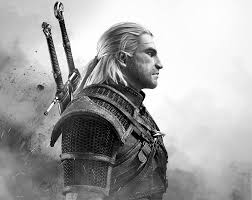

In [ ]:
image

In [ ]:
# get the image data
pixels = list(image.getdata())

In [ ]:
pixels[:10]

[190, 190, 190, 190, 190, 190, 190, 190, 190, 191]

In [ ]:
# Apply the negative effect
negative_pixels = [(255 - pixel) for pixel in pixels]

In [ ]:
negative_pixels[:10]

[65, 65, 65, 65, 65, 65, 65, 65, 65, 64]

In [ ]:
# Create a new image with the negative effect
negative_image = Image.new(image.mode, image.size)
negative_image.putdata(negative_pixels)

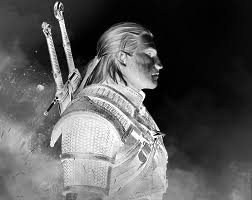

In [ ]:
negative_image

In [ ]:
# Save the negative image
negative_image.save("negative_image.jpg")

# 2. Gama Encoding/Correction

In [ ]:
image2 = Image.open("images/image2.jpeg")

In [ ]:
if image2.mode == "RGB":
    image2 = image2.convert("L")

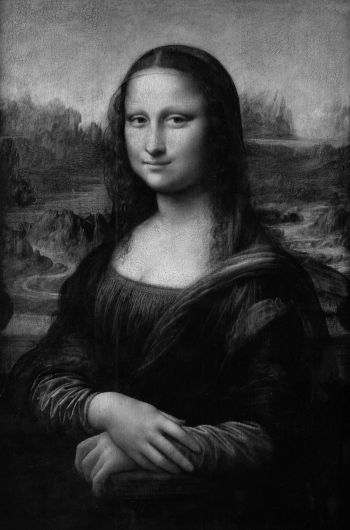

In [ ]:
image2

Gamma correction or gamma is a nonlinear operation used to encode and decode luminance or tristimulus values in video or still image systems. Gamma correction is, in the simplest cases, defined by the following power-law expression:

Corrected Intensity = Original Intensity^γ

In the common case inputs and outputs are typically in the range 0–1.

A gamma value γ < 1 is sometimes called an encoding gamma, and the process of encoding with this compressive power-law nonlinearity is called gamma compression; conversely, a gamma value γ > 1 is called a decoding gamma, and the application of the expansive power-law nonlinearity is called gamma expansion.

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Gamma_correction)

In [ ]:
def gamma_correction(image, gamma):
    image_array = np.array(image)

    corrected_image_array = np.power(image_array / 255.0, gamma) * 255.0

    corrected_image_array = corrected_image_array.astype(np.uint8)

    return Image.fromarray(corrected_image_array)

0.25

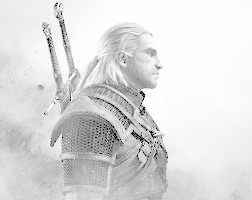

0.5

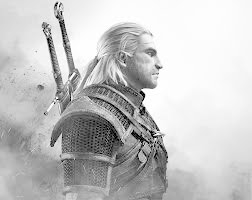

0.75

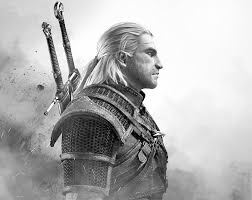

1

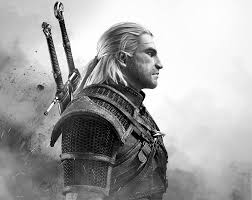

1.5

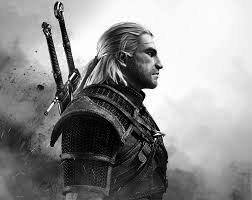

2

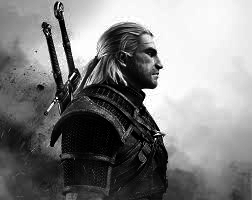

2.5

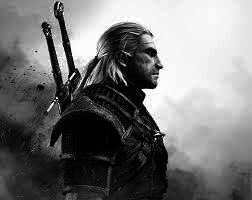

3

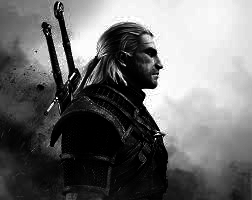

In [ ]:
gamma_values = [0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]
for gamma in gamma_values:
    corrected_image = gamma_correction(image, gamma)
    print(gamma, end="")
    display(corrected_image)

# Logarithmic

<ipython-input-31-627ea297b2b3>:10: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * (np.log(img + 1))
<ipython-input-31-627ea297b2b3>:13: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.uint8(log_transformed)


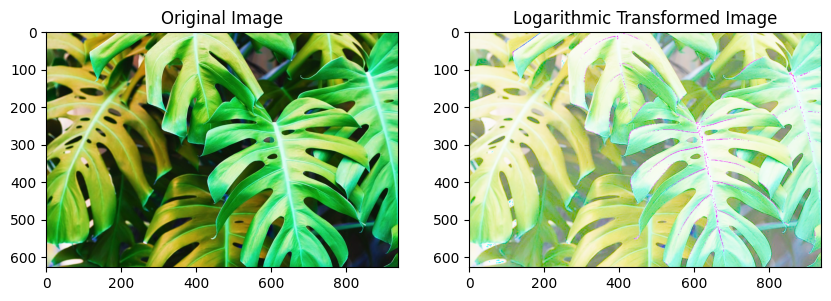

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/image3.jpeg')

c = 255 / np.log(1 + np.max(img))
log_transformed = c * (np.log(img + 1))

log_transformed = np.uint8(log_transformed)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Logarithmic Transformed Image')

plt.show()


# 4. Contrast Stretching

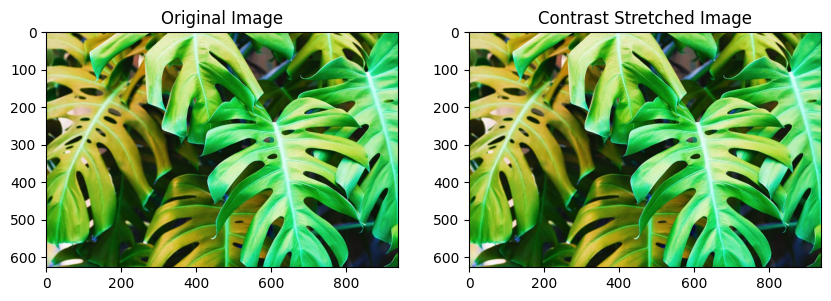

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/image3.jpeg')

min_intensity = np.min(img)
max_intensity = np.max(img)
stretched = 255 * ((img - min_intensity) / (max_intensity - min_intensity))

stretched = np.uint8(stretched)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(stretched, cmap='gray')
plt.title('Contrast Stretched Image')

plt.show()

#  5. Histogram Equalization

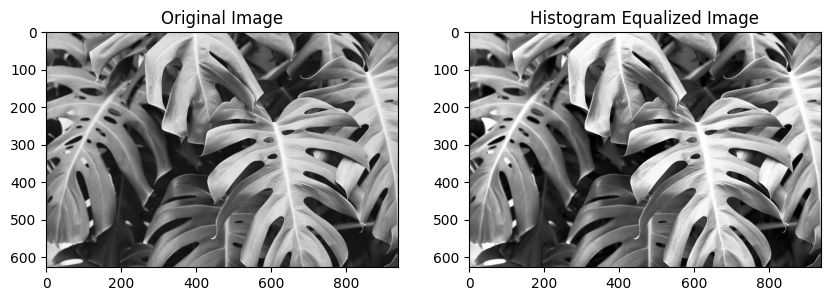

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image as grayscale
img = cv2.imread('images/image3.jpeg', 0)

# Apply histogram equalization
equalized = cv2.equalizeHist(img)

# Display original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized Image')

plt.show()

# 6. Intensity Level Slicing

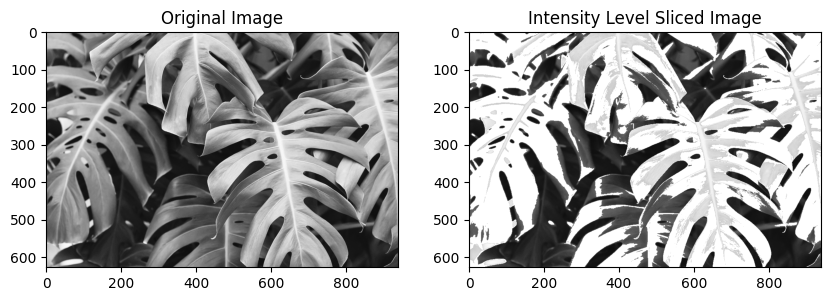

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def intensity_level_slicing(img, low, high, fill_value):
    mask = cv2.inRange(img, low, high)

    result = img.copy()
    result[mask != 0] = fill_value

    return result

img = cv2.imread('images/image3.jpeg', cv2.IMREAD_GRAYSCALE)

low_intensity = 100
high_intensity = 200
fill_value = 255

sliced_img = intensity_level_slicing(img, low_intensity, high_intensity, fill_value)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sliced_img, cmap='gray')
plt.title('Intensity Level Sliced Image')

plt.show()

# 7. Bit Plane Slicing

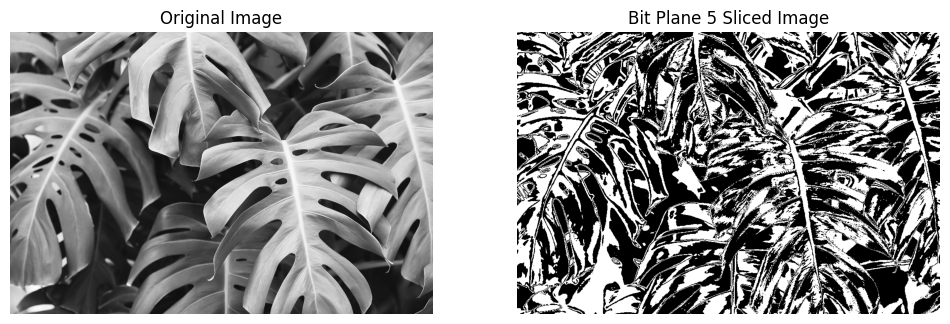

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def bit_plane_slice(img, plane):
    return (img >> plane) & 1

img = cv2.imread('images/image3.jpeg', cv2.IMREAD_GRAYSCALE)

bit_plane = 5

sliced_img = bit_plane_slice(img, bit_plane)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sliced_img, cmap='gray')
plt.title(f'Bit Plane {bit_plane} Sliced Image')
plt.axis('off')

plt.show()